<a href="https://colab.research.google.com/github/lxp521125/cnncode/blob/main/%E4%BC%A0%E7%BB%9F_%E6%AD%A3%E5%8F%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


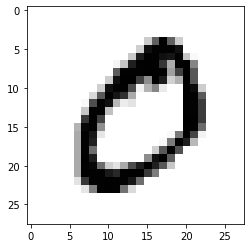

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist.load_data()
(x,y),(x1,y1) =  mnist

import matplotlib.pyplot as plt
plt.imshow(x[1], cmap="binary")
plt.show()


In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:

x = tf.concat([x, 255 - x],axis=0)
y = tf.concat([y, y],axis=0)

x1 = tf.concat([x1, 255 - x1],axis=0)
y1 = tf.concat([y1, y1],axis=0)

print(x.shape)
print(y.shape)


(120000, 28, 28)
(120000,)


In [5]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
tf.debugging.set_log_device_placement(True)
model.fit(x, y, epochs=50)

model.evaluate(x1,  y1, verbose=2)

Epoch 1/50
3750/3750 [==============================] - 11s 2ms/step - loss: 3.4487 - accuracy: 0.5155
Epoch 2/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.1585 - accuracy: 0.5700
Epoch 3/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.0878 - accuracy: 0.5840
Epoch 4/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.0622 - accuracy: 0.5953
Epoch 5/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.0446 - accuracy: 0.5973
Epoch 6/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.0368 - accuracy: 0.5991
Epoch 7/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.0275 - accuracy: 0.6015
Epoch 8/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.0235 - accuracy: 0.6025
Epoch 9/50
3750/3750 [==============================] - 9s 2ms/step - loss: 1.0143 - accuracy: 0.6040
Epoch 10/50
3750/3750 [==============================] - 8s 2ms/step - loss: 1.01

[1.2428058385849, 0.6090499758720398]